In [1]:
!pip install beautifulsoup4 requests pandas matplotlib seaborn


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully!")


Libraries imported successfully!


In [11]:
import pandas as pd

data = {
    'Job Title': [
        'Data Analyst', 'Data Scientist', 'Business Analyst', 'Data Engineer', 'BI Developer',
        'Data Scientist', 'Data Analyst', 'Software Engineer', 'Data Engineer', 'Data Analyst',
        'Machine Learning Engineer', 'Data Analyst', 'Business Intelligence Analyst', 'Data Engineer', 'Data Scientist',
        'Data Engineer', 'Machine Learning Engineer', 'Data Analyst', 'Data Scientist', 'Business Analyst'
    ],
    'Company': [
        'Company A', 'Company B', 'Company C', 'Company D', 'Company E',
        'Company A', 'Company B', 'Company C', 'Company D', 'Company E',
        'Company A', 'Company B', 'Company C', 'Company D', 'Company E',
        'Company A', 'Company B', 'Company C', 'Company D', 'Company E'
    ],
    'Location': [
        'New York', 'San Francisco', 'Austin', 'Seattle', 'Boston',
        'Los Angeles', 'Chicago', 'Austin', 'Seattle', 'New York',
        'San Francisco', 'Chicago', 'Seattle', 'Los Angeles', 'Boston',
        'San Francisco', 'Austin', 'Seattle', 'New York', 'Boston'
    ],
    'Skills': [
        'Python, SQL, Excel', 'Python, Machine Learning, SQL', 'SQL, Excel, Business Intelligence', 'Python, SQL, Data Engineering', 'Power BI, SQL, Data Visualization',
        'Python, Machine Learning, TensorFlow', 'SQL, Power BI, Data Analytics', 'Java, Python, Algorithms', 'Python, SQL, Data Engineering', 'Excel, Business Intelligence, Data Analytics',
        'Machine Learning, Python, SQL', 'Data Analysis, Python, Excel', 'Business Intelligence, SQL, Reporting', 'Python, SQL, Hadoop', 'TensorFlow, Deep Learning, Python',
        'Data Engineering, SQL, Python', 'Machine Learning, Python, Big Data', 'Data Analytics, Python, SQL', 'Data Science, Python, Machine Learning', 'Excel, SQL, Tableau'
    ]
}

jobs_df = pd.DataFrame(data)

jobs_df.head()


,Job Title,Company,Location,Skills
0,Data Analyst,Company A,New York,"Python, SQL, Excel"
1,Data Scientist,Company B,San Francisco,"Python, Machine Learning, SQL"
2,Business Analyst,Company C,Austin,"SQL, Excel, Business Intelligence"
3,Data Engineer,Company D,Seattle,"Python, SQL, Data Engineering"
4,BI Developer,Company E,Boston,"Power BI, SQL, Data Visualization"


In [12]:
jobs_df['Skill List'] = jobs_df['Skills'].apply(lambda x: [skill.strip() for skill in x.split(',')])

all_skills = sum(jobs_df['Skill List'].tolist(), [])

skill_counts = pd.Series(all_skills).value_counts()

skill_counts.head(10)


Python                   14
SQL                      13
Excel                     5
Machine Learning          5
Data Engineering          3
Data Analytics            3
Business Intelligence     3
Power BI                  2
TensorFlow                2
Data Visualization        1
dtype: int64

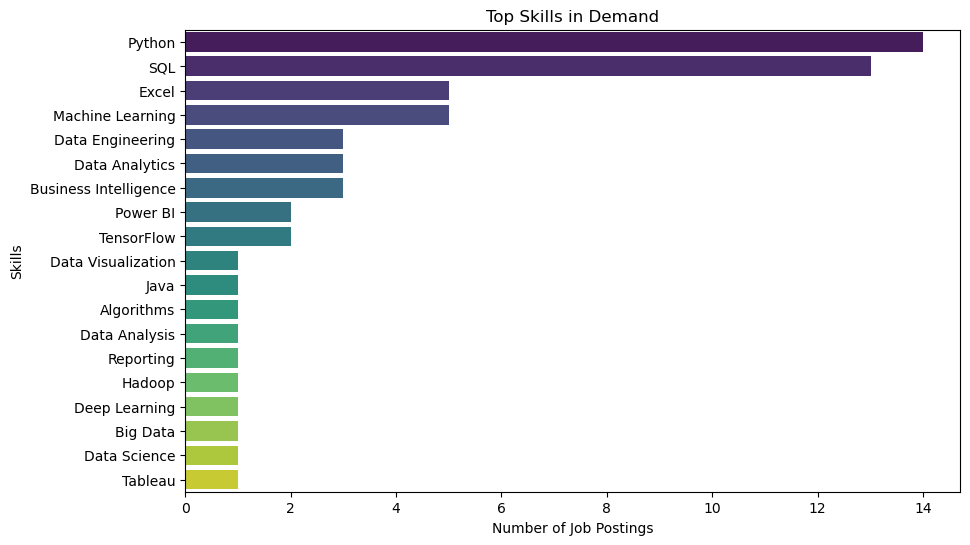

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=skill_counts.values, y=skill_counts.index, palette="viridis")
plt.title('Top Skills in Demand')
plt.xlabel('Number of Job Postings')
plt.ylabel('Skills')
plt.show()


C:\Users\aadit\AppData\Local\Temp\ipykernel_24312\2912353524.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skill_city_matrix = skill_city_matrix.append({
C:\Users\aadit\AppData\Local\Temp\ipykernel_24312\2912353524.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skill_city_matrix = skill_city_matrix.append({
C:\Users\aadit\AppData\Local\Temp\ipykernel_24312\2912353524.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skill_city_matrix = skill_city_matrix.append({
C:\Users\aadit\AppData\Local\Temp\ipykernel_24312\2912353524.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skill_city_matrix = skill_city_matrix.append({
C:\U

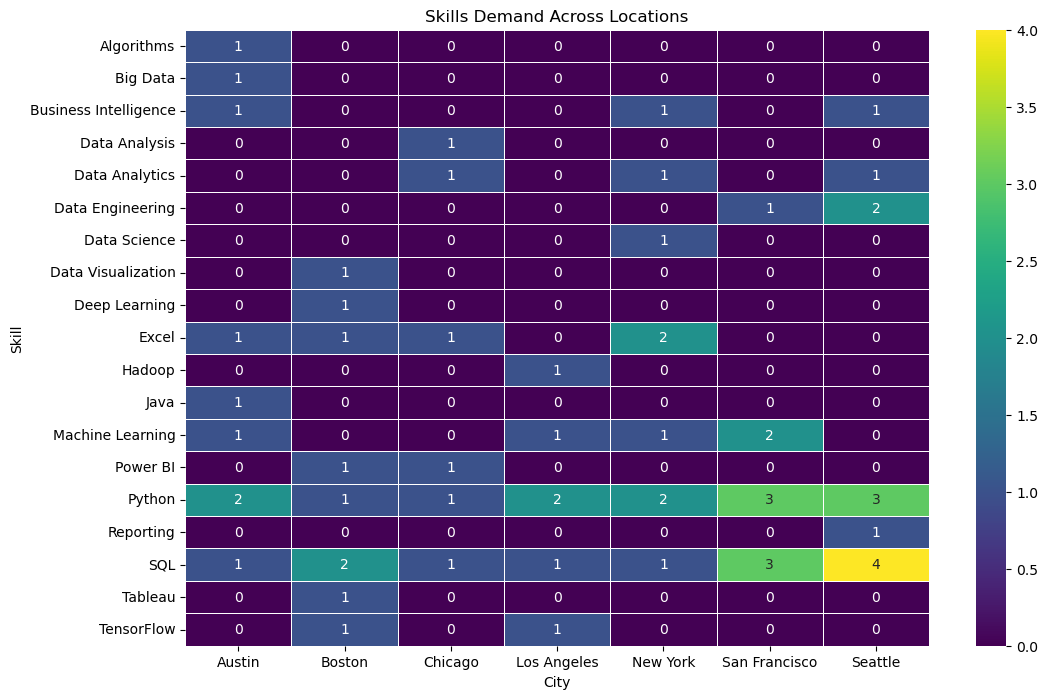

In [15]:
skill_city_matrix = pd.DataFrame()

for idx, row in jobs_df.iterrows():
    for skill in row['Skill List']:
        skill_city_matrix = skill_city_matrix.append({
            'City': row['Location'],
            'Skill': skill
        }, ignore_index=True)

pivot_table = pd.pivot_table(skill_city_matrix, index='Skill', columns='City', aggfunc=len, fill_value=0)

plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, cmap="viridis", annot=True, linewidths=0.5)
plt.title('Skills Demand Across Locations')
plt.xlabel('City')
plt.ylabel('Skill')
plt.show()


In [16]:
jobs_df.to_csv('job_trend_analysis.csv', index=False)

skill_counts.to_csv('skill_counts.csv')

print("CSV files saved successfully!")


CSV files saved successfully!
